In [1]:
import pandas as pd
import numpy as np

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import re

In [2]:
pd.options.display.max_colwidth = 200

In [3]:
df = pd.read_csv('csv_files/anxiety_tweets.csv')

In [4]:
df.tail(5)

,text,user,date,retweet,mention,hashtags,location
9995,Finished 2 seasons. I don't know. It gives me anxiety and makes me never want to speak to a man again.,mmmeghan,2019-11-22 02:19:36+00:00,0,NaN,NaN,NaN
9996,On a serious note I hate when people joke about and laugh about my rush anxiety. Like it really actually bothers me so please just don’t.,justlikestephxx,2019-11-22 02:05:33+00:00,0,NaN,NaN,NaN
9997,I think I’m having an anxiety attach? Is it like a shaking feelings were can feel all of your limps.,momozelly,2019-11-22 02:04:16+00:00,0,NaN,NaN,NaN
9998,Me tryna deal with anxiety depression Netflix and Apple Music bills https://twitter.com/memes_bizarre/status/1195701303047004160/video/1,smittty_93,2019-11-22 01:58:51+00:00,0,NaN,NaN,NaN
9999,"Interviews take way more out of you, I feel much more stress and anxiety that a common work day lmao",excusemeimjulia,2019-11-22 01:35:30+00:00,0,NaN,NaN,NaN


In [5]:
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation)
stop_words += ['anxiety','feel', 'give', 'giving', 'help', 'said', 'also', 'rt', 'gave', 'like', 'going', 'even']

In [6]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
def remove_urls(text):
    return re.sub(r'http\S+','', text)
   

In [8]:
df['text'] = df['text'].apply(remove_urls)

Observing removal of url in df

In [10]:
df.tail(2)

,text,user,date,retweet,mention,hashtags,location
9998,Me tryna deal with anxiety depression Netflix and Apple Music bills,smittty_93,2019-11-22 01:58:51+00:00,0,NaN,NaN,NaN
9999,"Interviews take way more out of you, I feel much more stress and anxiety that a common work day lmao",excusemeimjulia,2019-11-22 01:35:30+00:00,0,NaN,NaN,NaN


In [11]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token)>3]
    return stopwords_removed

In [12]:
df['text'] = df['text'].apply(tokenize_lowercase)

In [13]:
df['text'][0]

['okay',
 'totally',
 'understand',
 'specific',
 'struggles',
 'queer',
 'japanese',
 'japanese',
 'people',
 'open',
 'learning',
 'personally',
 'mean',
 'exist',
 'applies',
 'racism',
 'phobias',
 'list',
 'goes']

In [14]:
lemm = WordNetLemmatizer()
lemm.lemmatize('going')

'going'

In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

In [16]:
df['text'] = df['text'].apply(lemmatize_text)

In [17]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums

In [18]:
df['text'] = df['text'].apply(remove_nums)

In [19]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

words total, with a vocabulary size of 97690
Max tweet length is 32


In [129]:
df.shape

(10000, 7)

#### Observing df after stop words have been removed, text has been tokenized, lemmatized, url's removed, and any remaining non alpha characters have been stripped 

In [20]:
df.tail(2)

,text,user,date,retweet,mention,hashtags,location
9998,"[tryna, deal, depression, netflix, apple, music, bill]",smittty_93,2019-11-22 01:58:51+00:00,0,NaN,NaN,NaN
9999,"[interview, take, much, stress, common, work, lmao]",excusemeimjulia,2019-11-22 01:35:30+00:00,0,NaN,NaN,NaN


### Exploring the Processed Text

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize =12)
plt.show()

In [ ]:
flat_words = [item for sublist in df['text'] for item in sublist]

In [ ]:
word_freq = FreqDist(flat_words)

In [ ]:
word_freq.most_common(40)

In [ ]:
#create wordcloud here

### Modeling

In [21]:
text_dict = Dictionary(df.text)

In [22]:
text_dict.filter_extremes(no_below = 5, no_above = .90)

In [28]:
txt_out = text_dict.token2id

# for k, v in txt_out.items():
#     print(k,v)

In [26]:
# text_dict.save_as_text('tweet_text_dict.txt')

In [29]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [36]:
df['text'][9999]

['interview', 'take', 'much', 'stress', 'common', 'work', 'lmao']

In [37]:
tweets_bow[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1)]

In [38]:
k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [39]:
tweets_lda.show_topics()

[(0,
  '0.023*"depression" + 0.014*"stress" + 0.011*"time" + 0.011*"mental" + 0.010*"health" + 0.009*"really" + 0.008*"need" + 0.008*"take" + 0.008*"help" + 0.007*"right"'),
 (1,
  '0.027*"people" + 0.013*"social" + 0.012*"real" + 0.012*"depression" + 0.012*"fuck" + 0.012*"fear" + 0.011*"many" + 0.008*"pandemic" + 0.007*"life" + 0.007*"never"'),
 (2,
  '0.019*"give" + 0.015*"time" + 0.014*"roof" + 0.013*"today" + 0.010*"watching" + 0.010*"much" + 0.008*"shit" + 0.007*"love" + 0.007*"video" + 0.007*"family"'),
 (3,
  '0.018*"attack" + 0.018*"much" + 0.014*"time" + 0.012*"people" + 0.012*"sleep" + 0.010*"social" + 0.008*"night" + 0.008*"need" + 0.008*"make" + 0.007*"really"'),
 (4,
  '0.017*"back" + 0.013*"work" + 0.012*"attack" + 0.011*"know" + 0.011*"think" + 0.011*"year" + 0.010*"today" + 0.009*"really" + 0.009*"day" + 0.009*"would"')]

**From Eyeballing** 

* There does not seem to be a clear distinction between topics. Filler words such as "like, give, gave, etc." should be added to stop words list before another iteration.

* Topic 2 seems to be related to covid-19 and it's impact on peoples mental health


In [40]:
def format_topics_sentences(ldamodel=None, corpus=tweets_corpus, texts=df['text']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[tweets_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=tweets_lda, corpus=tweets_corpus, texts=df['text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_tobpic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6731,"people, worst, social, phone, like, life, think, call, time, many","[okay, totally, understand, specific, struggle, queer, japanese, japanese, people, open, learning, personally, mean, exist, applies, racism, phobia, list, go]"
1,1,0.0,0.7752,"people, real, coronavirus, make, level, pandemic, time, face, reason, social","[thing, know, returning, hair, salon, excitement, normal, salon, barber, shop, long, island, enters, phase]"
2,2,0.0,0.7335,"people, real, coronavirus, make, level, pandemic, time, face, reason, social","[well, information, would, useful, month, avoided, wasted, every, single, time, person, came, even, slightly, close, entering, general, vicinity]"
3,3,3.0,0.7082,"people, worst, social, phone, like, life, think, call, time, many","[greatest, lately]"
4,4,3.0,0.7542,"people, worst, social, phone, like, life, think, call, time, many","[mostly, afraid, really, misunderstanding, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validating, glad, worried, nothing]"
5,5,5.0,0.6509,"like, time, really, thing, know, going, people, take, roof, today","[damn, stressed, time, need, find, outlet, else, crazy, roof]"
6,6,7.0,0.4661,"stress, sleep, help, depression, pain, next, time, family, relief, tonight","[eating, cause, mind, lmaoo, need, gain, weight]"
7,7,2.0,0.5455,"give, morning, much, since, listening, work, handle, test, train, time","[would, called, police, forcibly, restrained, attack, allison, think, justiceforjonathansalcido]"
8,8,3.0,0.5586,"people, worst, social, phone, like, life, think, call, time, many",[summe]
9,9,1.0,0.4313,"like, much, fucking, right, attack, give, fuck, people, getting, bitch","[suck, prevalent, time, breathe, allow, ground, best, even, good, something, make, happy, write, anxious, driven, thought]"


In [41]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6731,"people, worst, social, phone, like, life, think, call, time, many","[okay, totally, understand, specific, struggle, queer, japanese, japanese, people, open, learning, personally, mean, exist, applies, racism, phobia, list, go]"
1,1,0.0,0.7752,"people, real, coronavirus, make, level, pandemic, time, face, reason, social","[thing, know, returning, hair, salon, excitement, normal, salon, barber, shop, long, island, enters, phase]"
2,2,0.0,0.7335,"people, real, coronavirus, make, level, pandemic, time, face, reason, social","[well, information, would, useful, month, avoided, wasted, every, single, time, person, came, even, slightly, close, entering, general, vicinity]"
3,3,3.0,0.7082,"people, worst, social, phone, like, life, think, call, time, many","[greatest, lately]"
4,4,3.0,0.7542,"people, worst, social, phone, like, life, think, call, time, many","[mostly, afraid, really, misunderstanding, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validating, glad, worried, nothing]"
5,5,5.0,0.6509,"like, time, really, thing, know, going, people, take, roof, today","[damn, stressed, time, need, find, outlet, else, crazy, roof]"
6,6,7.0,0.4661,"stress, sleep, help, depression, pain, next, time, family, relief, tonight","[eating, cause, mind, lmaoo, need, gain, weight]"
7,7,2.0,0.5455,"give, morning, much, since, listening, work, handle, test, train, time","[would, called, police, forcibly, restrained, attack, allison, think, justiceforjonathansalcido]"
8,8,3.0,0.5586,"people, worst, social, phone, like, life, think, call, time, many",[summe]
9,9,1.0,0.4313,"like, much, fucking, right, attack, give, fuck, people, getting, bitch","[suck, prevalent, time, breathe, allow, ground, best, even, good, something, make, happy, write, anxious, driven, thought]"


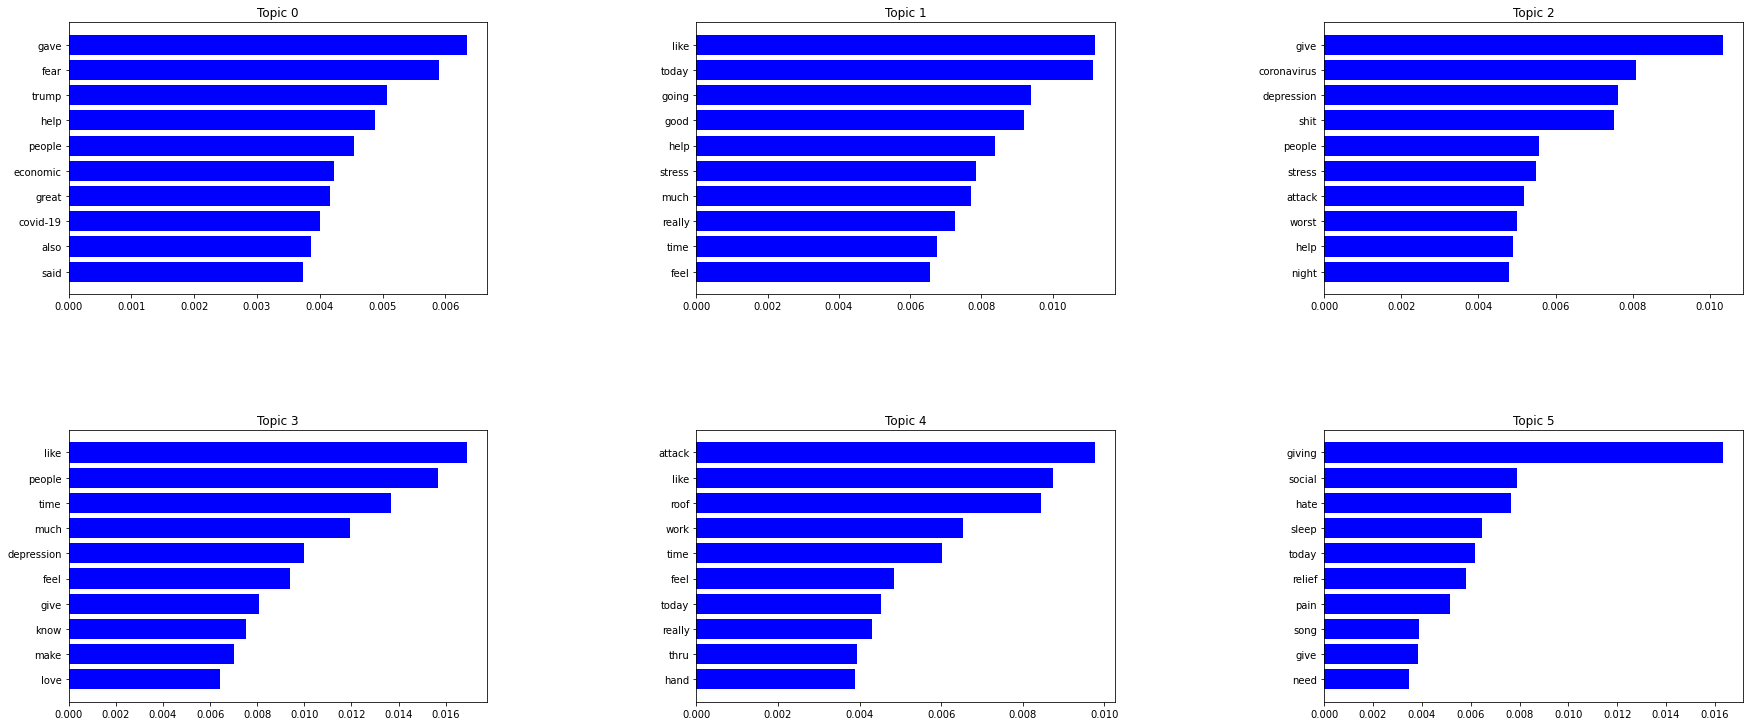

In [65]:
def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

In [113]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_corpus, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.063257 -0.131729       1        1  19.647491
5      0.054232 -0.129822       2        1  18.211004
0     -0.024381  0.001550       3        1  18.079288
1      0.064233 -0.073605       4        1  16.237560
2      0.211824  0.185760       5        1  14.184841
4     -0.242651  0.147846       6        1  13.639818, topic_info=           Term        Freq        Total Category  logprob  loglift
235        give  404.000000   404.000000  Default  30.0000  30.0000
195        shit  312.000000   312.000000  Default  29.0000  29.0000
90         much  611.000000   611.000000  Default  28.0000  28.0000
481        gave  193.000000   193.000000  Default  27.0000  27.0000
60         roof  217.000000   217.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
122  depression   74.001579   628.672424   Topic6  -5.0349  -0.1473
205       still   60.031284   261.340210   Topic6  -5.2441   0.5212
142        like   78.939201  1046.058838   Topic6  -4.9703  -0.5919
220       today   63.553772   440.770142   Topic6  -5.1871   0.0555
408        want   60.748627   327.521362   Topic6  -5.2322   0.3074

[422 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1692      6  0.956925  addiction
112       3  0.197840    already
112       4  0.234477    already
112       5  0.564211    already
247       1  0.760724     always
...     ...       ...        ...
724       5  0.976821       yoga
1178      4  0.620862       york
1178      5  0.370514       york
1122      3  0.027103    youtube
1122      5  0.948614    youtube

[751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 2, 3, 5])

### Using Random Tweets Dataset


In [45]:
df = pd.read_csv('csv_files/random_tweets.csv', index_col= [0])

In [46]:
df.head()

,text,user,date,retweet,mention,hashtags,location
0,Who you taking ? I’m saying jada,JanuaryCes,2020-06-29 23:59:59+00:00,0,NaN,NaN,NaN
1,He was always ready,J_BreezyLuv_,2020-06-29 23:59:59+00:00,0,NaN,NaN,NaN
2,Kind of,hayzawa,2020-06-29 23:59:59+00:00,0,NaN,NaN,NaN
3,NaN,_Spasmolytic_,2020-06-29 23:59:59+00:00,0,NaN,NaN,NaN
4,Place oyo azalaki kolobela yango soit courant ekenda ou bien tu dorme....,aldylukinda,2020-06-29 23:59:59+00:00,0,NaN,NaN,NaN


In [47]:
df.drop(columns = ['user', 'date',  'retweet', 'mention', 'hashtags', 'location'], inplace = True)

In [48]:
df.dropna(inplace = True)

In [49]:
stop_words = stopwords.words('english')
#add punctuation char's to stopwords list
stop_words += list(string.punctuation)


In [50]:
def remove_urls(text):
    return re.sub(r'http\S+','', text)

In [51]:
df['text'] = df['text'].apply(remove_urls)

In [52]:
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    tokens = word_tokenize(df_text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) > 3]
    
    lemmatized =[]
    
    for w in stopwords_removed:
        lemmatized.append(lemmatizer.lemmatize(w))
        
    processed = list(filter(lambda x: x.isalpha(), lemmatized))  
        
    return processed
    

In [53]:
df['text'] = df['text'].apply(preprocess)

In [54]:
df.head()

,text
0,"[taking, saying, jada]"
1,"[always, ready]"
2,[kind]
4,"[place, azalaki, kolobela, yango, soit, courant, ekenda, bien, dorme]"
5,"[sound, like, someone, never, quoted, porn, film]"


In [55]:
df.shape

(11574, 1)

In [56]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

64424 words total, with a vocabulary size of 16263
Max tweet length is 32


In [63]:
flat_words = [item for sublist in df['text'] for item in sublist]

freq = FreqDist(flat_words)

freq.most_common(30)

[('like', 671),
 ('people', 417),
 ('know', 383),
 ('time', 340),
 ('love', 276),
 ('need', 271),
 ('would', 268),
 ('good', 266),
 ('really', 247),
 ('right', 230),
 ('make', 229),
 ('think', 221),
 ('even', 205),
 ('want', 205),
 ('going', 200),
 ('look', 199),
 ('shit', 193),
 ('back', 192),
 ('thing', 188),
 ('year', 188),
 ('thank', 188),
 ('still', 182),
 ('trump', 175),
 ('never', 164),
 ('black', 154),
 ('take', 153),
 ('better', 151),
 ('much', 151),
 ('work', 150),
 ('also', 149)]

In [58]:
text_dict = Dictionary(df.text)
text_dict.filter_extremes(no_below = 5, no_above = .90)

In [59]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [60]:
k = 6
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [61]:
tweets_lda.show_topics()

[(0,
  '0.028*"good" + 0.018*"really" + 0.017*"well" + 0.016*"lmao" + 0.014*"done" + 0.013*"tell" + 0.011*"work" + 0.011*"hope" + 0.010*"trump" + 0.010*"believe"'),
 (1,
  '0.024*"thank" + 0.019*"take" + 0.015*"please" + 0.014*"time" + 0.013*"thanks" + 0.012*"right" + 0.011*"still" + 0.011*"life" + 0.009*"today" + 0.009*"stop"'),
 (2,
  '0.029*"people" + 0.025*"shit" + 0.025*"look" + 0.018*"like" + 0.017*"white" + 0.015*"black" + 0.012*"great" + 0.010*"yeah" + 0.008*"care" + 0.008*"release"'),
 (3,
  '0.017*"ever" + 0.017*"video" + 0.013*"word" + 0.013*"tweet" + 0.012*"best" + 0.012*"watch" + 0.011*"happy" + 0.010*"live" + 0.010*"damn" + 0.010*"nigga"'),
 (4,
  '0.035*"like" + 0.019*"need" + 0.017*"people" + 0.015*"thing" + 0.015*"would" + 0.012*"said" + 0.011*"fuck" + 0.011*"make" + 0.010*"could" + 0.010*"last"'),
 (5,
  '0.035*"know" + 0.031*"love" + 0.019*"like" + 0.015*"going" + 0.013*"better" + 0.012*"back" + 0.011*"feel" + 0.011*"virgil" + 0.009*"someone" + 0.009*"anyone"')]